# STEPS TO BE PERFORMED IN EDA :-

In [182]:
#### importing the required libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sns
from scipy.stats import chi2_contingency

In [104]:
### LOADING THE DATASET ###
df1= pd.read_csv(r"C:\Users\LENOVO\Desktop\sample datasets\train_eda.csv")
df2= pd.read_csv(r"C:\Users\LENOVO\Desktop\sample datasets\test_eda.csv")
df = pd.concat([df,df1])
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2.0


# 1. UNDERSTANDING THE DATA:-
  -checking for number of rows, columns
  
  -checking for column names, their data types
  
  -checking for missing value count
  
  -classifying columns as numerical, categorical and mixed

In [105]:
df.shape

(2673, 13)

In [106]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'family_size'],
      dtype='object')

In [107]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             531
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          2061
Embarked          6
family_size    1782
dtype: int64

In [108]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
family_size    float64
dtype: object

##### classifying columns ########
numerical- PassengerId, Age, Fare,

categorical- Survived, Pclass, Sex, SibSp, Parch, Embarked

mixed- Name, Ticket, Cabin

# 2. BASIC DATA CLEANING:-
 -correct data type of column (if needed) ex- object-> datetime
 
 -fix inconsistent data (standardize values)
 
 -rename columns (if needed)
 
 -change indices (if needed)

########  common inbuild functions that can be used to perform basic data cleaning  ##########


1	Correct Types:-   	.astype(), pd.to_datetime()

2	Remove Duplicates:- 	.duplicated(), .drop_duplicates()

3	Fix Categories:- 	.str.lower(), .str.strip()

4	Rename Columns:- 	.rename(columns={})

5	Reset Index:- 	.reset_index(drop=True)

In [109]:
df['Age'].unique

<bound method Series.unique of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 2673, dtype: float64>

In [110]:
a=df['Sex'].value_counts()
b=df['Embarked'].value_counts()
print(a,b)

Sex
male      1731
female     942
Name: count, dtype: int64 Embarked
S    1932
C     504
Q     231
Name: count, dtype: int64


###### conclusion for basic data cleaning ######
- no correction needed for column data type
  [Age column has values in months(0.4, 0.6) therefore cannot convert it from float to integer]
- no inconsistent data values
- no need for changing column names and indices 

# 3.Univariate Analysis
(Univariate analysis focuses on analyzing each feature in the dataset independently)
- Distribution analysis: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.
- Identifying potential issues: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values

# STEPS INVOLED IN UNIVARIENT ANALYSIS FOR NUMERICAL DATA:-
 -Descriptive Statistics: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. 
 
-Visualizations:Some common visualizations for numerical data include histograms, box plots, and density plots. 

-Identifying Outliers: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

-Skewness:  A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

-Conclusion: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [144]:
df1['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [145]:
df1['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [146]:
df1['Age'].isnull().sum()

177

In [147]:
df1['Age'].isnull().sum()/len(df1['Age'])*100

19.865319865319865

In [148]:
df1['Age'].skew()

0.38910778230082704

In [149]:
df1['Age'].kurt()

0.17827415364210353

<Axes: xlabel='Age', ylabel='Count'>

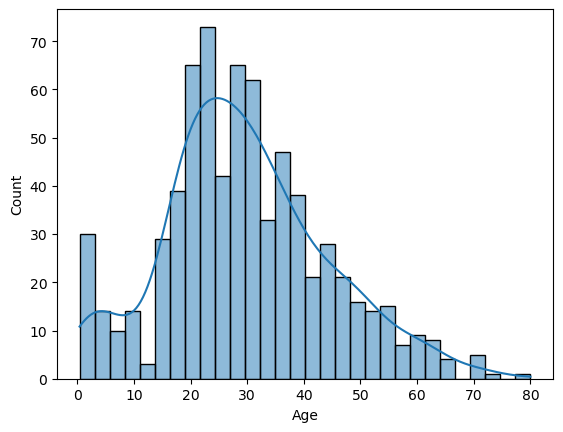

In [150]:
sns.histplot(df1['Age'], bins=30, kde=True)

<Axes: xlabel='Age', ylabel='Density'>

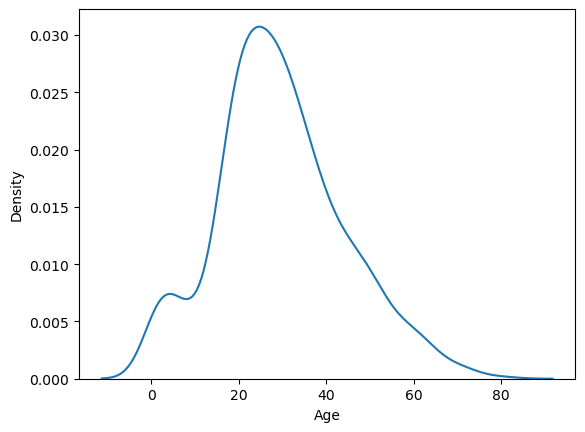

In [151]:
sns.kdeplot(df1['Age'])

<Axes: >

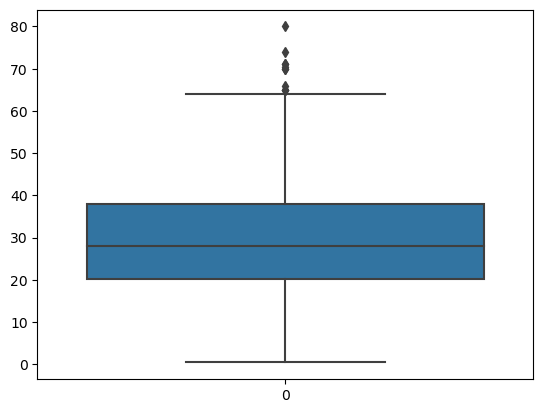

In [152]:
sns.boxplot(df1['Age'])

In [153]:
df1[df1['Age']>=65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


######## insights after applying univarient analysis on age column  ########
1. has 177 missing values, appox 20% values are missing
2. data is normally distributed and has less outliners
3. 50% of the people are around the age of 28 years

In [154]:
df1['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [156]:
a=df1['Fare'].median()
b=df1['Fare'].mode()
print(a,b)

14.4542 0    8.05
Name: Fare, dtype: float64


In [157]:
df1['Fare'].isnull().sum()

0

In [158]:
df1['Fare'].skew()

4.787316519674893

In [159]:
df1['Fare'].kurt()

33.39814088089868

<Axes: xlabel='Fare', ylabel='Count'>

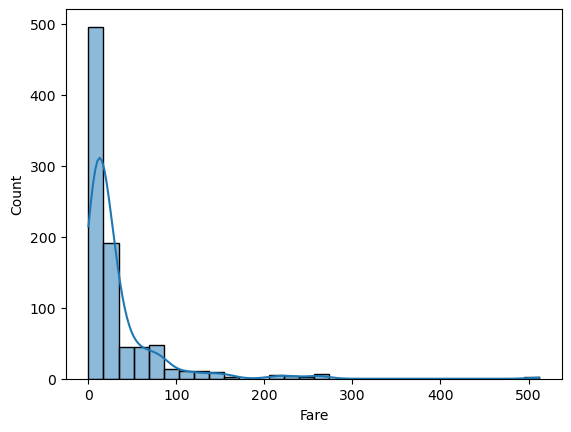

In [160]:
sns.histplot(df1['Fare'], bins=30, kde=True)

<Axes: xlabel='Fare', ylabel='Density'>

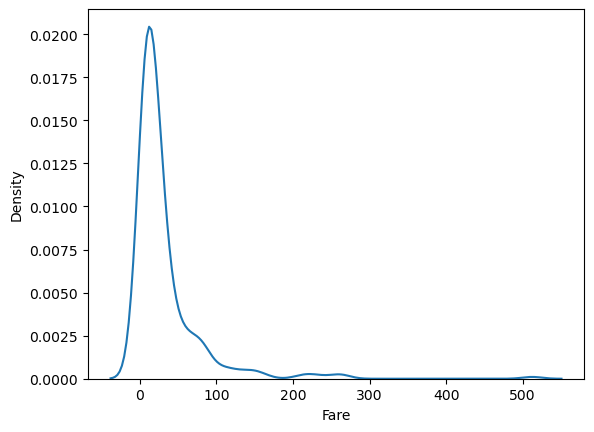

In [161]:
sns.kdeplot(df1['Fare'])

<Axes: >

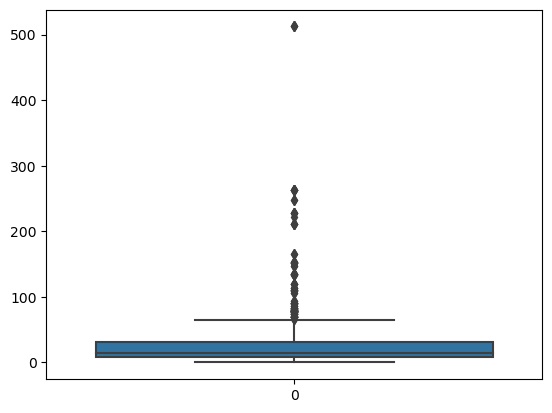

In [176]:
sns.boxplot(df1['Fare'])

In [163]:
(df1['Fare']>90).sum()/len(df1['Fare'])*100

6.397306397306397

######## insights after applying univarient analysis on fare column  ########
1. the coloumn has no missing values
2. data is highly skewed (positively) and has outliners(approx 60 or 6%)

# 📖 Physical Significance of Statistical Measures
1. **Mean (Average)**

What it is: Sum of all values divided by the number of values.

Physical Meaning:
➔ The "center of mass" or "balance point" of the data.
➔ It tells you the typical value if everyone shared equally.

Example:
If the mean age is 30 years, most people are centered around that age.


2. **Median**

What it is: The middle value when all values are sorted.

Physical Meaning:
➔ It represents the central tendency that's unaffected by extreme values (outliers).
➔ Half of the observations are smaller and half are larger.

Example:
If the median age is 28, then 50% of the people are younger than 28, and 50% are older.


3. **Mode**

What it is: The most frequent value in the data.

Physical Meaning:
➔ Represents the most common real-world occurrence.

Example:
If the mode of age is 24, it means that the largest number of passengers were 24 years old.


4. **Variability (Spread)**

What it is: How much the data is spread out.

Physical Meaning:
➔ Measures how different or diverse the individuals are.

Example:
If age variability is high, there are both very young and very old passengers.
If low, most passengers are of similar ages.


5. **Standard Deviation**

What it is: Square root of variance; shows average distance from the mean.

Physical Meaning:
➔ Tells how tightly or loosely values are clustered around the mean.

Example:

Small standard deviation ➔ Most ages are close to the mean age.

Large standard deviation ➔ Ages are widely spread out.


6. **Skewness**

What it is: A measure of asymmetry in the distribution.

Physical Meaning:
➔ Tells if the data is pulled more to the left or right.

Types:

Positive skew (right-skewed) ➔ Few very high values pull the mean upward.

Negative skew (left-skewed) ➔ Few very low values pull the mean downward.

Example:
If Age has positive skew, a few old passengers (maybe age 70-80) are pulling the average up.


7. **Kurtosis**

What it is: A measure of how "peaked" or "flat" a distribution is.

Physical Meaning:
➔ Tells whether the data has many extreme values (outliers) or not.

Types:

High kurtosis ➔ Sharp peak and fat tails (many outliers).

Low kurtosis ➔ Flat distribution (fewer outliers).

Example:
If Age has low kurtosis (like yours ~0.18), most passengers have ages close to the mean, and extreme ages (like 1 year or 80 years) are rare.



# Steps of doing Univariate Analysis on Categorical columns
Descriptive Statistics: Compute the frequency distribution of the categories in the column. 

Missing Values: Check for missing values in the data and decide how to handle them.

Visualizations: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. 

Conclusion: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

In [165]:
df1['Survived'].isnull().sum()

0

In [166]:
survived_counts=df1['Survived'].value_counts()
survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

In [167]:
df1['Survived'].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

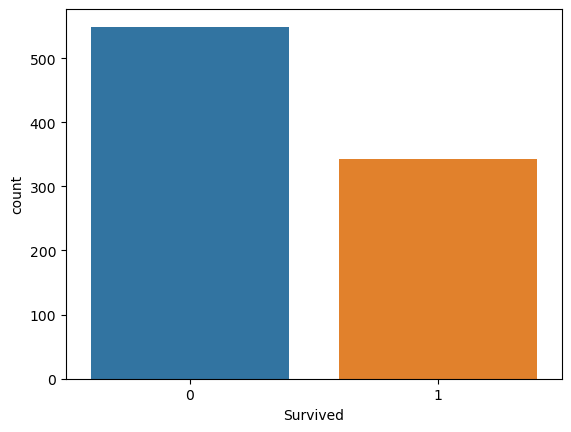

In [168]:
sns.countplot(x='Survived',data=df1)

([<matplotlib.patches.Wedge at 0x1f848cf9310>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Did Not Survive'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

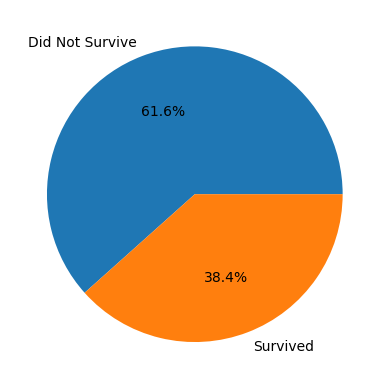

In [134]:
labels = ['Did Not Survive' if val == 0 else 'Survived' for val in survived_counts.index]
mplot.pie(survived_counts, labels=labels, autopct='%1.1f%%')


######## insights after applying univarient analysis on survived column  ########
1. no missing values
2. 61% of the people did not survived

In [169]:
df1['Sex'].isnull().sum()

0

In [170]:
count=df1['Sex'].value_counts()
count

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

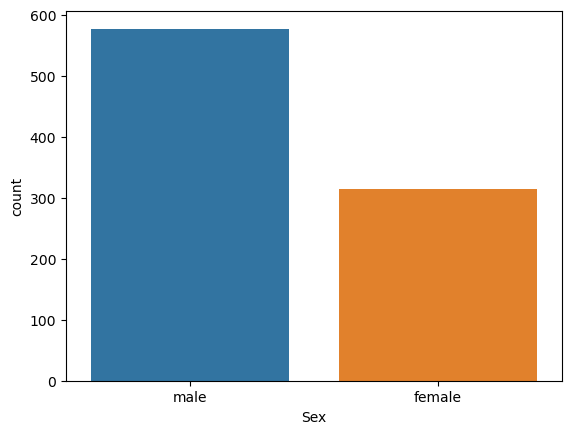

In [171]:
sns.countplot(x='Sex', data=df1)

([<matplotlib.patches.Wedge at 0x1f84a543710>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.8%'),
  Text(0.26833391225261044, -0.53665343708506, '35.2%')])

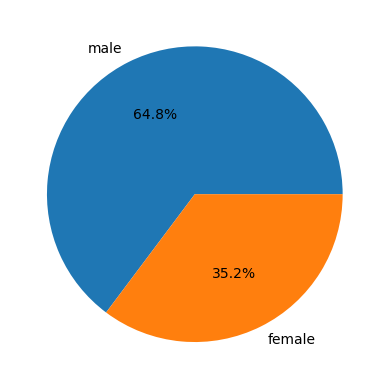

In [138]:
labels=['male' if val=="male" else 'female'for val in count.index]
mplot.pie(count, labels=labels,autopct='%1.1f%%')

######## insights after applying univarient analysis on Sex column  ########
1. no missing values
2. male dominated data(64.8%)

In [172]:
df1['Pclass'].isnull().sum()

0

In [173]:
val_counts=df1['Pclass'].value_counts()
val_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

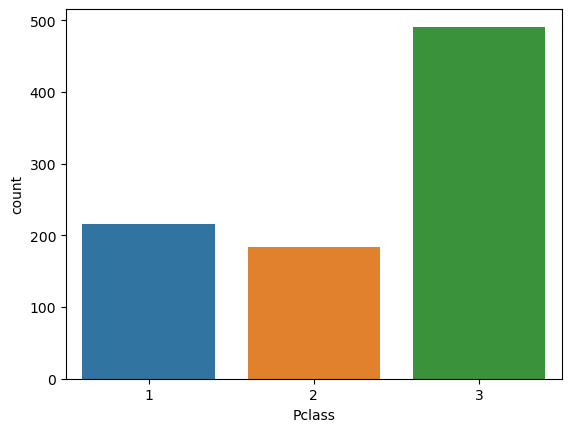

In [174]:
sns.countplot(x='Pclass', data=df1)

([<matplotlib.patches.Wedge at 0x1f84a4f2710>,
 [Text(-0.17571616709359641, 1.0858746836637898, 'third class'),
  Text(-0.5160762002061153, -0.9714243951954356, 'first class'),
  Text(0.8765111456658484, -0.6646263698677192, 'second class')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.1%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.2%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.7%')])

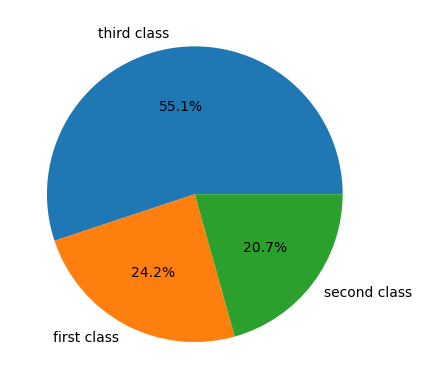

In [142]:
lables= ['first class' if val==1 else 'second class' if val==2 else 'third class' for val in val_counts.index]
mplot.pie(val_counts, labels=lables, autopct='%1.1f%%')

######## insights after applying univarient analysis on Pclass column ########
1. no missing values
2. highest(55.1%) number of people are travelling in third class shows it's more affordable
3. then 24.2% people are travelling in first class and lowest count is in second class

# step:4        BiVARIENT ANALYSIS

# Steps of doing Bivariate Analysis
Select 2 cols

Understand type of relationship

Numerical - Numerical

a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots

b. Check correlation coefficent to check linear relationship

Numerical - Categorical - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.

a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots

Categorical - Categorical

a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.

b. You can plots like heatmap, stacked barplots, treemaps

Write your conclusions

##  perform bivarient analysis on survived column(output column) and other columns to check how different columns affect the output value
Look For Pairs That...

1.Contain your target variable 

2.Have enough variation

3.Make logical or domain sense

4.Combine categorical + numerical for distribution insights

5.Combine categorical + categorical for influence patterns

6.Combine numerical + numerical to spot linear trends



In [211]:
df['family_size']=df['SibSp']+df['Parch']+1

In [222]:
df['individual_fare']=df['Fare']/df['family_size']

##### we will be performing bivarient analysis on 
1. survived class and pclass
2. survived class and sex
3. survived class and age
4. survived class and family_size 
5. pclass and fare

In [194]:
contingency_table= pd.crosstab(df1['Survived'],df1['Pclass'])
contingency_table

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [196]:
######## checking the rate in percentage
pd.crosstab(df1['Survived'],df1['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


PHYSICAL SIGNIFICANCE OF APPLYING CHI2 TEST ON THE DATA

The Chi-Square Test (chi2_contingency) is a statistical test used to determine whether two categorical variables are 
independent (unrelated) or associated (dependent) in a population.

Key Terms Explained:
1. 📊 Contingency Table

A 2D table showing frequency counts for combinations of the two variables.
Example: How many 1st class passengers survived vs didn't, and so on.

2. 🧮 Chi2 Statistic (chi2)

This measures how far the observed values in your contingency table deviate from the expected values (if the variables were 
independent).

A high chi2 value suggests a large difference = likely dependent

A low chi2 value suggests small difference = likely independent

3. 📉 P-Value

The probability that the observed difference is due to random chance.

If p < 0.05 → statistically significant = variables are dependent

If p ≥ 0.05 → not significant = variables are likely independent

4. 🎯 Degrees of Freedom (dof)

This represents the number of values that can vary freely given the constraints.

Formula:

dof=(rows−1)×(columns−1)

In [195]:
chi2,p,dof,expected=chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi2 value: 102.88898875696056
P-Value: 4.549251711298793e-23
Degrees of Freedom: 2


In [198]:
contingency_table_2= pd.crosstab(df1['Survived'],df1['Sex'])
contingency_table_2

Sex,female,male
Survived,,
0,81,468
1,233,109


In [199]:
pd.crosstab(df1['Survived'],df1['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


In [203]:
chi2,p,dof,expected=chi2_contingency(contingency_table_2)
print(f"chi2 value:{chi2}")
print(f"p value:{p}")
print(f"dof value:{dof}")

chi2 value:260.71702016732104
p value:1.1973570627755645e-58
dof value:1


In [215]:
contingency_table_3= pd.crosstab(df['Survived'],df['family_size'])
contingency_table_3

family_size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,1122,216,129,24,36,57,24,18,21
1,489,267,177,63,9,9,12,0,0


In [218]:
pd.crosstab(df['Survived'],df['family_size'],normalize='columns')*100

family_size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,69.646182,44.720497,42.156863,27.586207,80.0,86.363636,66.666667,100.0,100.0
1,30.353818,55.279503,57.843137,72.413793,20.0,13.636364,33.333333,0.0,0.0


In [217]:
chi2,p,dof,expected=chi2_contingency(contingency_table_3)
print(f"chi2 value: {chi2}")
print(f"p value: {p}")
print(f"dof value: {dof}")

chi2 value: 242.01694031349234
p value: 8.468292196545625e-48
dof value: 8


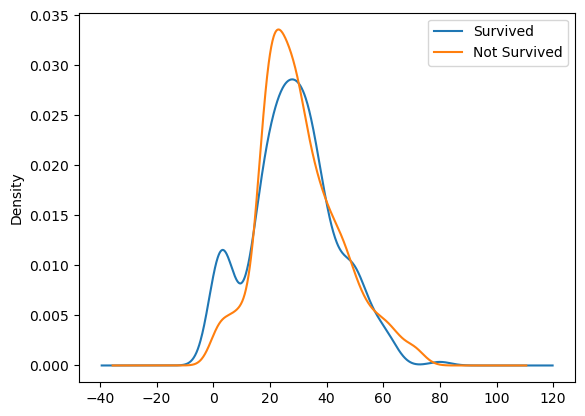

In [221]:
df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

mplot.legend()
mplot.show()

In [226]:
contingency_table_4= pd.crosstab(df['Pclass'],df['individual_fare'])
contingency_table_4

individual_fare,0.000000,1.132143,2.409733,2.583333,2.618067,2.641667,2.875000,2.887500,3.125000,3.247900,...,134.500000,135.633300,146.520800,151.550000,153.462500,211.337500,221.779200,227.525000,256.164600,512.329200
Pclass,,,,,,,,,,,,,,,,,,,,,
1,15,0,0,0,0,0,0,0,0,0,...,3,9,3,3,3,3,3,9,3,6
2,18,0,0,0,0,0,3,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,12,3,6,3,3,6,0,3,0,3,...,0,0,0,0,0,0,0,0,0,0


In [229]:
chi2,p,dof,expected=chi2_contingency(contingency_table_4)
print(f"chi2 value: {chi2}")
print(f"p value: {p}")
print(f"dof value: {dof}")

chi2 value: 5095.099696714779
p value: 0.0
dof value: 576


# STEP:5  INDENTIFYING PATTERNS AND INSIGHTS AND DOCUMENTING CONCLUSIONS

classifying columns
numerical- PassengerId, Age, Fare,

categorical- Survived, Pclass, Sex, SibSp, Parch, Embarked

mixed- Name, Ticket, Cabin

------------------------------------------------------------------------------------------------------------------------

###### conclusion for basic data cleaning ######
- no correction needed for column data type
  [Age column has values in months(0.4, 0.6) therefore cannot convert it from float to integer]
- no inconsistent data values
- no need for changing column names and indices 

------------------------------------------------------------------------------------------------------------------------

######## insights after applying univarient analysis on age column ########

1. has 177 missing values, appox 20% values are missing
2. data is normally distributed and has less outliners
3. 50% of the people are around the age of 28 years


######## insights after applying univarient analysis on fare column  ########
1. the coloumn has no missing values
2. data is highly skewed (positively) and has outliners(approx 60 or 6%)


######## insights after applying univarient analysis on survived column  ########
1. no missing values
2. 61% of the people did not survived

######## insights after applying univarient analysis on Sex column  ########
1. no missing values
2. male dominated data(64.8%)

######## insights after applying univarient analysis on Pclass column ########
1. no missing values
2. highest(55.1%) number of people are travelling in third class shows it's more affordable
3. then 24.2% people are travelling in first class and lowest count is in second class

------------------------------------------------------------------------------------------------------------------------

########### conclusions from performing bivarient analysis ########
1. pclass and gender are highly affecting the survival rate
 - females have a higher survival(74%) rate and males have less survival rate(18%)
 - people in first class have higher survival rate and people in 2nd and 3rd class have less survival rate
2. age is also affecting the survival rate but not much difference is there
3. family size
 - individuals and family with family_size> 5 have very less survival rate
 - people with small family_size ie- >2 but <6 have higher survival rate
4. fare and pclass:
 - 1st class: high fare
 - 2nd class: medium fare
 - 3rd class: low fare